In [8]:
import pandas
import matplotlib.pyplot as plt
from numpy import nan 
from matplotlib import font_manager, rc
# 그래프에 한글 오류뜰때 해결방법
font_path = './malgun.ttf' # 한글폰트 경로지정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [9]:
df = pandas.read_excel('시도별 전출입 인구수.xls')
df = df.ffill() # 앞 데이터를 따라 nan값을 채워주라
df = df.replace('-',nan) # 분석을 위해 '-'로 되어있는 값들을 nan값으로
df = df.drop(0,axis = 0) # 필요없는 행 지우기 , axis : 축 지정
df.rename({'전출지별':'전출지', '전입지별':'전입지'},axis=1,inplace=True) # 칼러명 이름 바꿔줄 때 rename() 함수 이용, dict타입으로 (axis는 컬럼:1, 인덱스:0)

In [10]:
mask = (df['전출지']=='서울특별시') & (df['전입지']!='서울특별시') 
df_seoul = df[mask]# 전출지가 서울이여야하고, 전입지는 서울특별시가 아니여야함! ''&연산'으로 마스킹하기.
df_seoul = df_seoul.drop('전출지',axis =1) # 불필요한 전출지 칼럼명 drop() , 컬럼이니까 축 : 1 지정
df_seoul=df_seoul.set_index('전입지') # 인덱스를 전입지로 설정

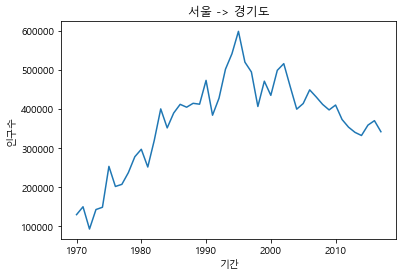

In [11]:
# 서울에서 경기도로 전입한 인구만 따로 뽑아서 그래프 그리기
sr1 = df_seoul.loc['경기도']

plt.plot(sr1.index.map(int), sr1.values)
plt.title('서울 -> 경기도')
plt.xlabel('기간')
plt.ylabel('인구수')
plt.show()